In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('"{name}" carregado com sucesso.'.format(name=fn))

Saving log_clicks_all.csv to log_clicks_all.csv
Saving log_mouse_path.csv to log_mouse_path.csv
Saving log_summary.txt to log_summary.txt
"log_clicks_all.csv" carregado com sucesso.
"log_mouse_path.csv" carregado com sucesso.
"log_summary.txt" carregado com sucesso.


In [3]:
df_mouse = pd.read_csv('log_mouse_path.csv')
df_clicks = pd.read_csv('log_clicks_all.csv')

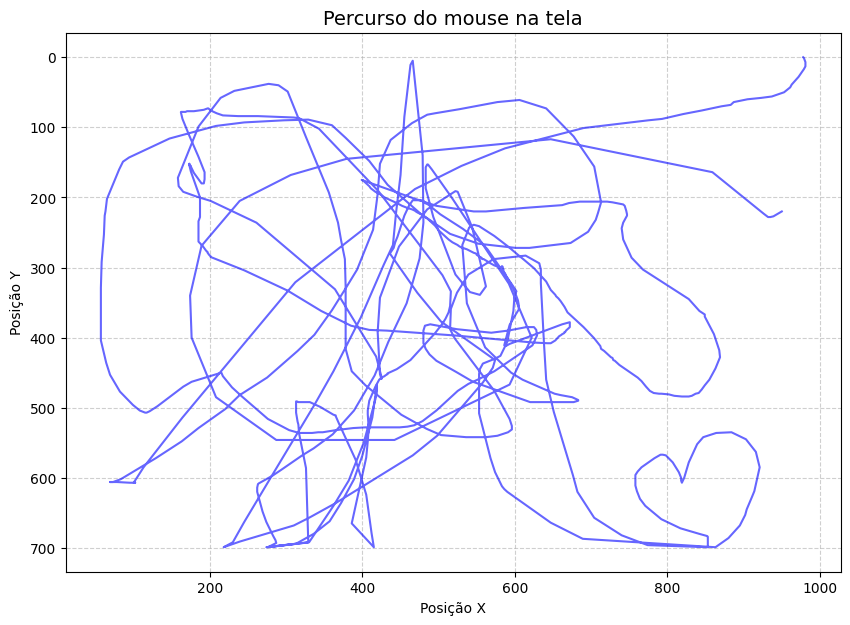

In [4]:
plt.figure(figsize=(10, 7))
plt.plot(df_mouse['x'], df_mouse['y'], color='blue', alpha=0.6)
plt.gca().invert_yaxis()
plt.title('Percurso do mouse na tela', fontsize=14)
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

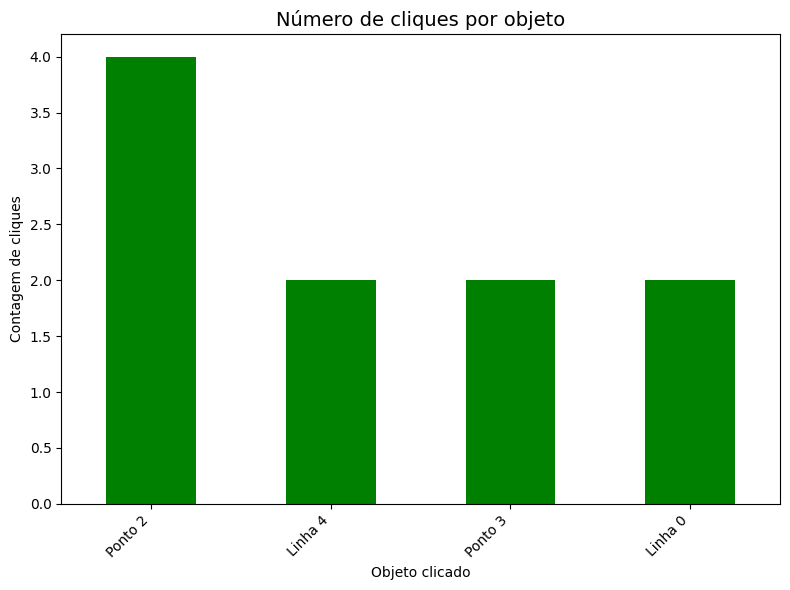

In [5]:
cliques_por_objeto = df_clicks['objects'].value_counts()

plt.figure(figsize=(8, 6))
cliques_por_objeto.plot(kind='bar', color='green')
plt.title('Número de cliques por objeto', fontsize=14)
plt.xlabel('Objeto clicado')
plt.ylabel('Contagem de cliques')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

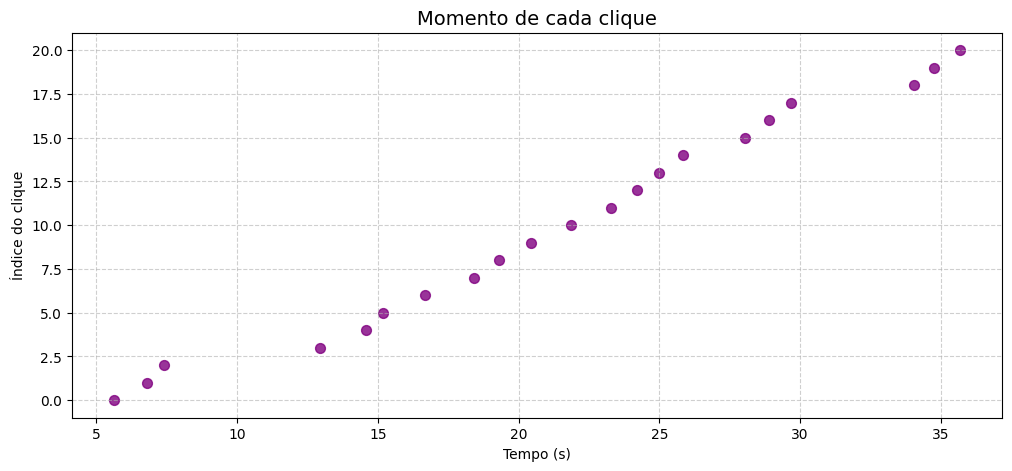

In [6]:
plt.figure(figsize=(12, 5))
plt.scatter(df_clicks['time_rel'], df_clicks.index, color='purple', alpha=0.8, s=50)
plt.title('Momento de cada clique', fontsize=14)
plt.xlabel('Tempo (s)')
plt.ylabel('Índice do clique')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

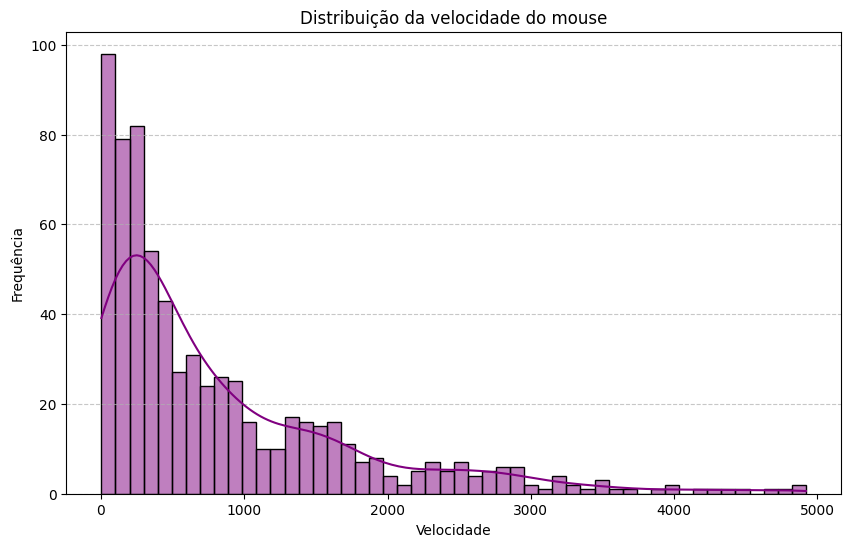

In [7]:
df_mouse['vel_total'] = (df_mouse['vel_x']**2 + df_mouse['vel_y']**2)**0.5
df_mouse_clean = df_mouse[df_mouse['vel_total'] < df_mouse['vel_total'].quantile(0.99)]

plt.figure(figsize=(10, 6))
sns.histplot(df_mouse_clean['vel_total'], bins=50, kde=True, color='purple')
plt.title('Distribuição da velocidade do mouse')
plt.xlabel('Velocidade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

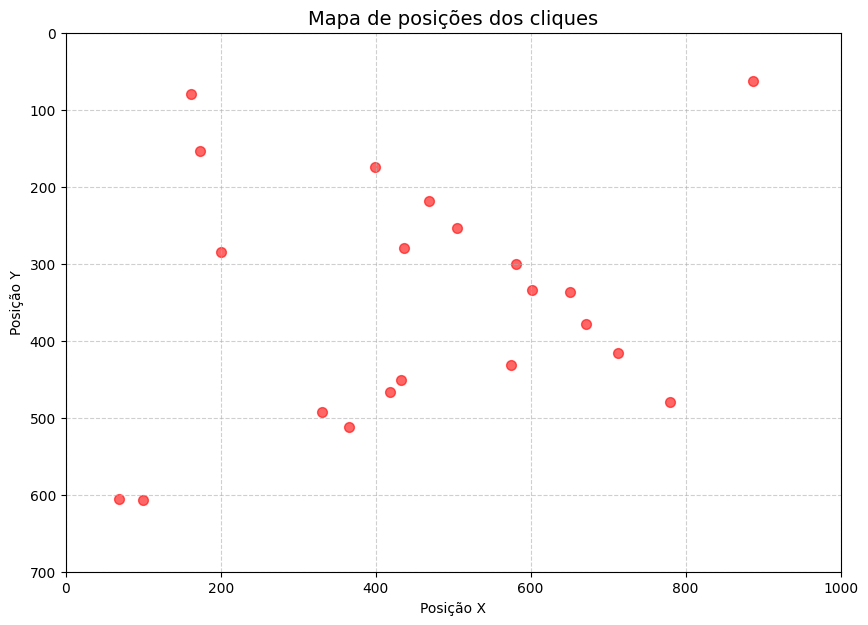

In [8]:
W, H = 1000, 700

plt.figure(figsize=(10, 7))

plt.scatter(
    x=df_clicks['x'],
    y=df_clicks['y'],
    color='red',
    alpha=0.6,
    s=50
)

plt.xlim(0, W)
plt.ylim(0, H)
plt.gca().invert_yaxis()
plt.title('Mapa de posições dos cliques', fontsize=14)
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

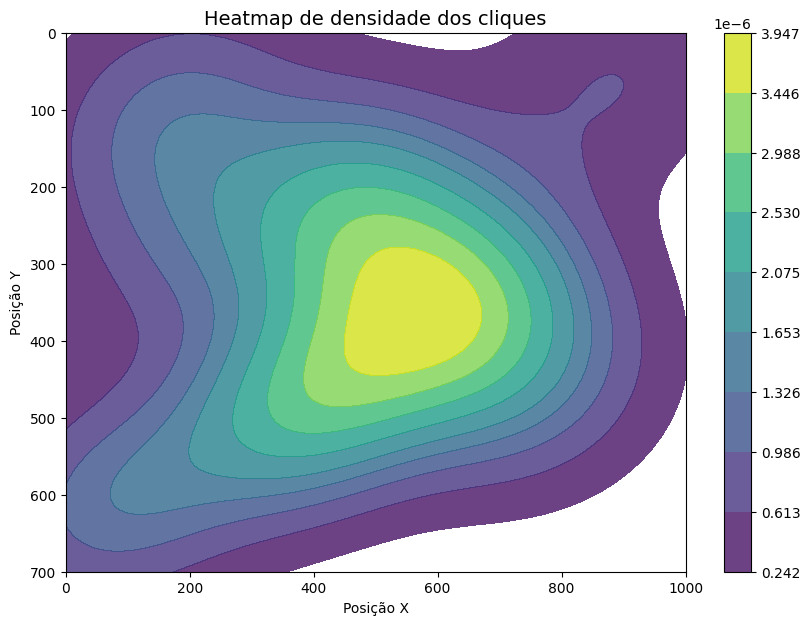

In [9]:
plt.figure(figsize=(10, 7))

sns.kdeplot(
    x=df_clicks['x'],
    y=df_clicks['y'],
    fill=True,
    cmap='viridis',
    alpha=0.8,
    cbar=True
)
plt.xlim(0, W)
plt.ylim(0, H)
plt.gca().invert_yaxis()
plt.title('Heatmap de densidade dos cliques', fontsize=14)
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.show()